# TOPAS-nBio Analysis Toolkit for DNA Damage Output

This notebook demonstrates how to use the dnadamage_phsp_manager.py and sddparser.py functions to analyze DNA damage output from TOPAS-nBio simulations.

In [2]:
import sys
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

# Import our custom modules
from dnadamage_phsp_manager import *
import sddparser

## 1. Single Run Analysis

Read and analyze a single run of DNADamage output.

In [5]:
# Define file paths (using the paths from my_tests.py)
base_path = '../TOPAS_CellsNPs/work/only_results_CellColony-med0-cell0/cell2/run1/DNADamage'
#base_path = "/home/radiofisica/hector/mytopassimulations/TOPAS_CellsNPs/work/TestCellColony/cell1/run1/DNADamage"

# Read the phase space data
df = read_dnadamage_phase_space(base_path)

# Display the dataframe head
print("DNA Damage phase space data:")
df.head()

DNA Damage phase space data:


,Energy_imparted_per_event [keV],Dose_per_event_Gy,DSB/Gy/Gbp,SSB/Gy/Gbp,SB/Gy/Gbp,SSB+/Gy/Gbp,DSB+/Gy/Gbp,MoreComplexDamage/Gy/Gbp,BD/Gy/Gbp,DSBs,...,SBs_Indirect,SSB+s,DSB+s,More complex damages,BDs,BDs_Direct,BDs_QuasiDirect,BDs_Indirect,Foci_150nm,Foci_500nm
0,2.562250,0.000976,0.0000,168.5170,168.5170,0.0,0,0,505.5520,0,...,1,0,0,0,3,3,3,0,0,0
1,15.548300,0.006901,23.8416,119.2080,166.8910,0.0,0,0,619.8820,1,...,5,0,0,0,26,7,3,19,1,1
2,0.650778,0.007149,0.0000,23.0146,23.0146,0.0,0,0,23.0146,0,...,1,0,0,0,1,0,0,1,1,1
3,4.046050,0.008691,0.0000,0.0000,0.0000,0.0,0,0,18.9318,0,...,0,0,0,0,1,0,0,1,1,1
4,8.838430,0.012145,0.0000,0.0000,0.0000,0.0,0,0,67.7333,0,...,0,0,0,0,5,0,0,5,1,1


Total damage statistics:
Total number of events: 16
Total energy deposited: 0.09 MeV
Total DSBs: 3
Total DSBs_Direct: 0
Total DSBs_Indirect: 0
Total DSBs_Hybrid: 3
Total DSBs_Direct_WithOneQuasiDirect: 0
Total DSBs_Direct_WithBothQuasiDirect: 0
Total DSBs_Hybrid_WithOneQuasiDirect: 1
Total SSBs: 27
Total SSBs_Direct: 9
Total SSBs_QuasiDirect: 5
Total SSBs_Indirect: 18
Total SBs: 33
Total SBs_Direct: 12
Total SBs_QuasiDirect: 6
Total SBs_Indirect: 21
Total SSB+s: 1
Total DSB+s: 0
Total More complex damages: 0
Total BDs: 87
Total BDs_Direct: 18
Total BDs_QuasiDirect: 12
Total BDs_Indirect: 69
Total Foci_150nm: 23
Total Foci_500nm: 23


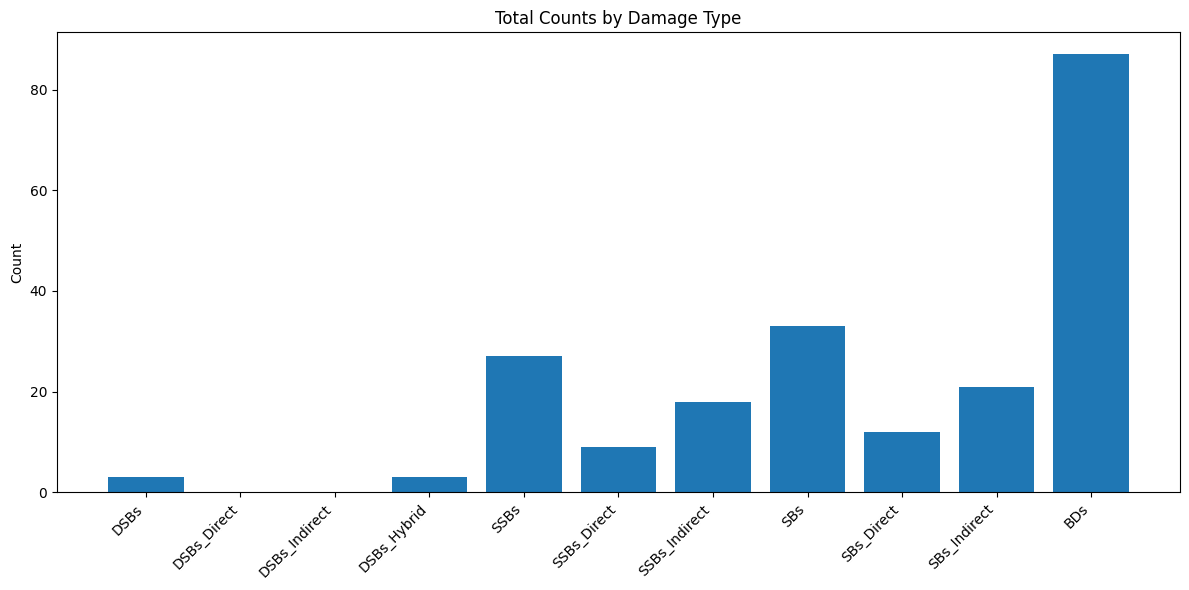

In [6]:
# Calculate and display total damage statistics
print("Total damage statistics:")
total_damage(df)

# Plot the distribution of damage types
damage_columns = [
    'DSBs', 'DSBs_Direct', 'DSBs_Indirect', 'DSBs_Hybrid',
    'SSBs', 'SSBs_Direct', 'SSBs_Indirect',
    'SBs', 'SBs_Direct', 'SBs_Indirect',
    'BDs'
]

# Create a subset of damage columns that are actually in our dataframe
available_damage_columns = [col for col in damage_columns if col in df.columns]

# Calculate total counts for each damage type
damage_totals = {col: df[col].sum() for col in available_damage_columns}

# Plot as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(damage_totals.keys(), damage_totals.values())
plt.xticks(rotation=45, ha='right')
plt.title('Total Counts by Damage Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 2. SDD File Analysis

Parse and analyze a Standard DNA Damage (SDD) file using sddparser.

In [7]:
# Define SDD file path
sdd_file = "../TOPAS_CellsNPs/work/only_results_CellColony-med0-cell0/cell2/run1/DNADamage_sdd.txt"
verbose = False

# Parse the SDD file
header, events = sddparser.parseSDDFileFlat(sdd_file, verbose)

# Display header information
print("=== SDD Header Information ===")
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(header)

=== SDD Header Information ===
{ 'Additional Information': '',
  'Author': 'Name',
  'Cell Cycle Phase': 0.0,
  'Chromosomes': [ 46,
                   [ 252.823,
                     252.823,
                     248.157,
                     248.157,
                     204.04,
                     204.04,
                     195.556,
                     195.556,
                     184.951,
                     184.951,
                     174.77,
                     174.77,
                     162.469,
                     162.469,
                     149.318,
                     149.318,
                     143.38,
                     143.38,
                     138.289,
                     138.289,
                     137.441,
                     137.441,
                     135.32,
                     135.32,
                     116.655,
                     116.655,
                     108.595,
                     108.595,
                     102.656,
     


=== First 3 Events ===

Event #1:
{ 'Cause': [2, 1, 1],
  'Chromosome ID': [1, 33, 1, 0],
  'Chromosome Position': 0.265854069534,
  'Damage Spec': [['2', '1', '1'], ['4', '4', '2']],
  'Damage Types': [1, 11, 0],
  'EID': 1399,
  'NewEvent': 2,
  'Pos': [ [2.02202, -1.22417, 2.0008],
           [2.02206, -1.22382, 2.0013],
           [2.02199, -1.22451, 2.0003]]}

Event #2:
{ 'Cause': [0, 1, 0],
  'Chromosome ID': [1, 33, 1, 0],
  'Chromosome Position': 0.232237838296,
  'Damage Spec': [['2', '1', '1'], ['2', '2', '0']],
  'Damage Types': [1, 10, 0],
  'EID': 1399,
  'NewEvent': 0,
  'Pos': [ [1.995486, -1.250366, 2.01712],
           [1.995486, -1.250366, 2.01712],
           [1.995486, -1.250366, 2.01712]]}

Event #3:
{ 'Cause': [0, 1, 0],
  'Chromosome ID': [1, 33, 1, 0],
  'Chromosome Position': 0.26582272513,
  'Damage Spec': [['3', '1', '1']],
  'Damage Types': [1, 10, 0],
  'EID': 1399,
  'NewEvent': 0,
  'Pos': [ [2.04812, -1.222977, 1.984105],
           [2.04812, -1.222977,

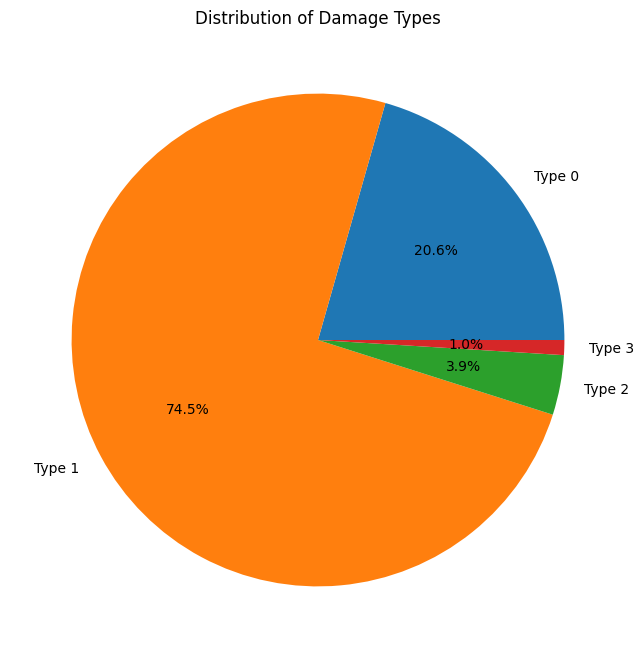

In [8]:
# Display the first few events
print("\n=== First 3 Events ===")
for idx, event in enumerate(events[:3]):
    print(f"\nEvent #{idx + 1}:")
    pp.pprint(event)

# Count different types of events
print("\n=== Event Statistics ===")
print(f"Total number of events: {len(events)}")

# If 'Damage Types' exists in events, analyze distribution
if events and 'Damage Types' in events[0]:
    damage_types = [event['Damage Types'][0] for event in events if 'Damage Types' in event]
    unique_types = set(damage_types)
    type_counts = {t: damage_types.count(t) for t in unique_types}
    print("\nDamage Type Distribution:")
    for damage_type, count in type_counts.items():
        print(f"Type {damage_type}: {count} events ({count/len(damage_types)*100:.2f}%)")
    
    # Plot damage type distribution as a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(type_counts.values(), labels=[f"Type {t}" for t in type_counts.keys()], autopct='%1.1f%%')
    plt.title('Distribution of Damage Types')
    plt.show()

## 3. Multi-Run Analysis

Merge and analyze data from multiple simulation runs.

In [14]:
# Define file paths for multiple runs

filebases = [f'../TOPAS_CellsNPs/work/only_results_CellColony-med0-cell0/cell2/run{i+1}/DNADamage' for i in range(100)]

# Merge data from multiple runs
merged_df = merge_dnadamage_files(filebases)

# Display the merged dataframe's summary
print("Merged DNA Damage data summary:")
print(f"Total events: {len(merged_df)}")
merged_df.describe()

Merged DNA Damage data summary:
Total events: 984


,Energy_imparted_per_event [keV],Dose_per_event_Gy,DSB/Gy/Gbp,SSB/Gy/Gbp,SB/Gy/Gbp,SSB+/Gy/Gbp,DSB+/Gy/Gbp,MoreComplexDamage/Gy/Gbp,BD/Gy/Gbp,DSBs,...,SBs_Indirect,SSB+s,DSB+s,More complex damages,BDs,BDs_Direct,BDs_QuasiDirect,BDs_Indirect,Foci_150nm,Foci_500nm
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.0,984.0,984.000000,984.000000,...,984.000000,984.000000,984.0,984.0,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,6.748080,0.015820,1.794323,39.355204,42.943852,0.990912,0.0,0.0,99.754423,0.100610,...,1.459350,0.076220,0.0,0.0,5.428862,1.222561,0.658537,4.206301,0.612805,0.612805
std,5.562780,0.010658,8.869563,71.042827,74.919473,5.064886,0.0,0.0,150.150729,0.329986,...,1.824546,0.280393,0.0,0.0,5.172804,1.687805,0.998100,4.001160,0.918599,0.918599
min,0.374031,0.000261,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.574813,0.007087,0.000000,0.000000,3.340450,0.000000,0.0,0.0,20.743650,0.000000,...,0.000000,0.000000,0.0,0.0,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.929330,0.014126,0.000000,17.705050,19.763050,0.000000,0.0,0.0,50.702950,0.000000,...,1.000000,0.000000,0.0,0.0,4.000000,1.000000,0.000000,3.000000,0.000000,0.000000
75%,9.105432,0.022946,0.000000,45.301050,48.572600,0.000000,0.0,0.0,111.818750,0.000000,...,2.000000,0.000000,0.0,0.0,7.000000,2.000000,1.000000,6.000000,1.000000,1.000000
max,28.105800,0.052432,133.167000,995.807000,995.807000,91.996100,0.0,0.0,1647.960000,3.000000,...,12.000000,2.000000,0.0,0.0,38.000000,16.000000,7.000000,29.000000,4.000000,4.000000


Total damage statistics for merged data:
Total number of events: 984
Total energy deposited: 6.64 MeV
Total DSBs: 99
Total DSBs_Direct: 25
Total DSBs_Indirect: 23
Total DSBs_Hybrid: 51
Total DSBs_Direct_WithOneQuasiDirect: 5
Total DSBs_Direct_WithBothQuasiDirect: 3
Total DSBs_Hybrid_WithOneQuasiDirect: 22
Total SSBs: 2180
Total SSBs_Direct: 841
Total SSBs_QuasiDirect: 276
Total SSBs_Indirect: 1339
Total SBs: 2378
Total SBs_Direct: 942
Total SBs_QuasiDirect: 309
Total SBs_Indirect: 1436
Total SSB+s: 75
Total DSB+s: 0
Total More complex damages: 0
Total BDs: 5342
Total BDs_Direct: 1203
Total BDs_QuasiDirect: 648
Total BDs_Indirect: 4139
Total Foci_150nm: 603
Total Foci_500nm: 603


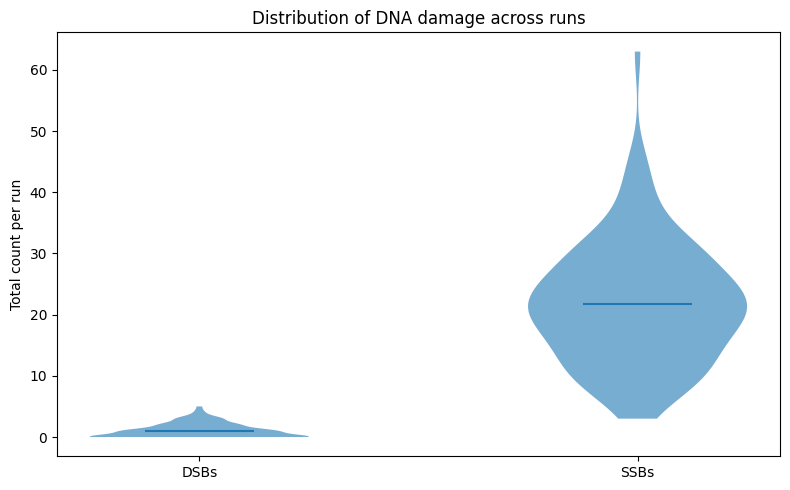

Run with maximum DSBs: run41  (total = 5)
Run with maximum SSBs: run3  (total = 63)


In [15]:
# Calculate total damage statistics for the merged data
print("Total damage statistics for merged data:")
total_damage(merged_df)

# ------------------------------------------------------------------------
# 1. Carga los resultados de cada run
# ------------------------------------------------------------------------
run_dfs = []
for base in filebases:
    run_name = os.path.basename(os.path.dirname(base))
    df = read_dnadamage_phase_space(base)
    run_dfs.append((run_name, df))

# ------------------------------------------------------------------------
# 2. Prepara los datos para violin plot
# ------------------------------------------------------------------------
damage_types = ['DSBs', 'SSBs']
available = [d for d in damage_types if all(d in df.columns for _, df in run_dfs)]

# Para cada tipo de daño, reúne la lista de totales run-a-run
violin_data = []
for dmg in available:
    totals = [df[dmg].sum() for _, df in run_dfs]
    violin_data.append(totals)

# ------------------------------------------------------------------------
# 3. Dibuja violines
# ------------------------------------------------------------------------
if violin_data:
    plt.figure(figsize=(8, 5))

    parts = plt.violinplot(
        violin_data,
        showmeans=True,        # punto de la media
        showmedians=False,
        showextrema=False
    )

    # Ajusta opacidad y contorno si lo deseas
    for pc in parts['bodies']:
        pc.set_alpha(0.6)

    # Etiquetas
    plt.xticks(np.arange(1, len(available) + 1), available)
    plt.ylabel('Total count per run')
    plt.title('Distribution of DNA damage across runs')
    plt.tight_layout()
    plt.show()
else:
    print("No common damage columns found in all runs.")


# ── Identify runs with the highest DSB and SSB totals ────────────────────
if not run_dfs:
    raise RuntimeError("run_dfs is empty – load the runs first.")

totals = {
    'DSBs': [],
    'SSBs': []
}

for run_name, df in run_dfs:
    if 'DSBs' in df.columns:
        totals['DSBs'].append((run_name, df['DSBs'].sum()))
    if 'SSBs' in df.columns:
        totals['SSBs'].append((run_name, df['SSBs'].sum()))

for damage_type, values in totals.items():
    if not values:
        print(f"No '{damage_type}' column found in the data.")
        continue

    # values = list of (run_name, total_count)
    run_max, val_max = max(values, key=lambda x: x[1])
    print(f"Run with maximum {damage_type}: {run_max}  (total = {val_max})")



## 4. Advanced Visualizations

Create more advanced visualizations of DNA damage data.

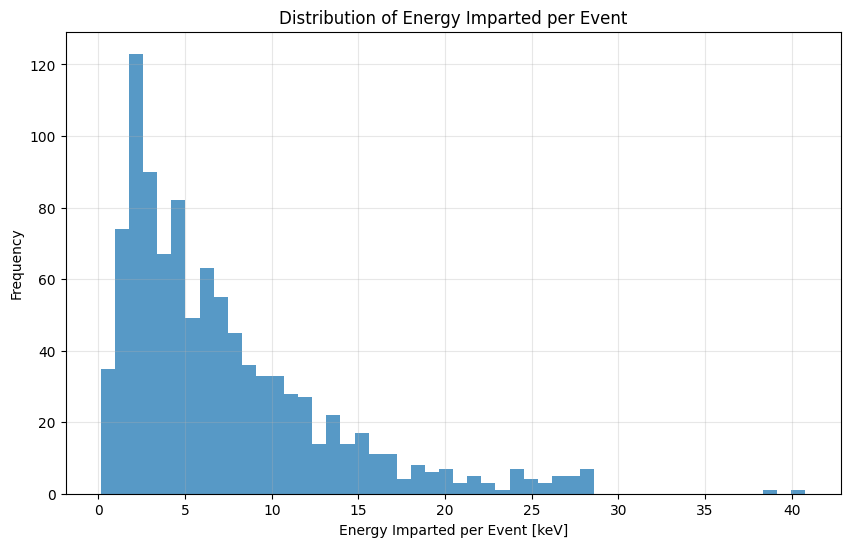

In [12]:
# Example: Plot histograms of energy imparted per event
if 'Energy_imparted_per_event [keV]' in merged_df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(merged_df['Energy_imparted_per_event [keV]'], bins=50, alpha=0.75)
    plt.xlabel('Energy Imparted per Event [keV]')
    plt.ylabel('Frequency')
    plt.title('Distribution of Energy Imparted per Event')
    plt.grid(True, alpha=0.3)
    plt.show()


## 5. Custom Analysis

Create a custom analysis specific to your research needs.

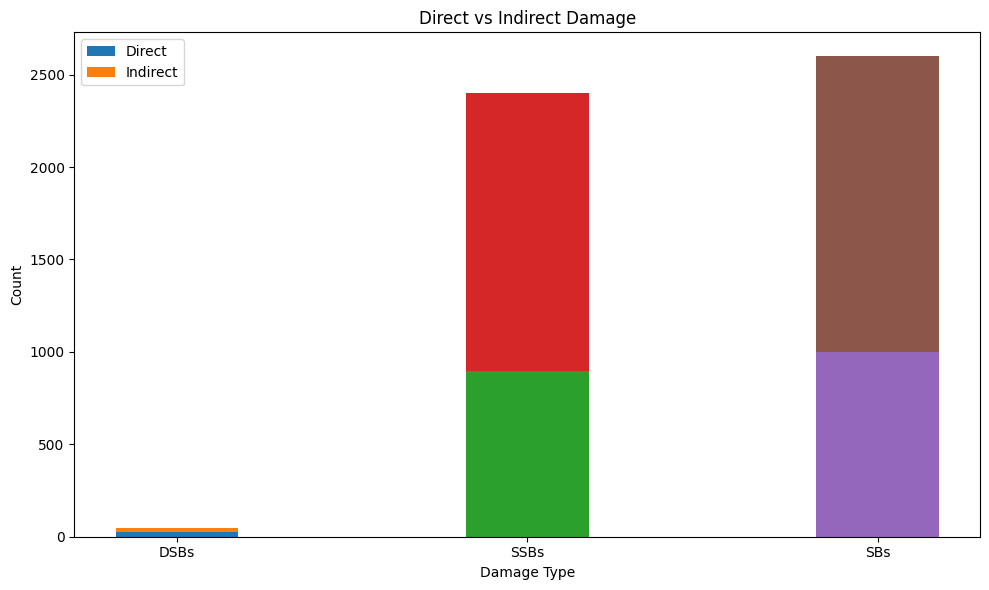

In [13]:
# Example: Analyze the ratio of direct vs indirect damage
damage_pairs = [
    ('DSBs_Direct', 'DSBs_Indirect'),
    ('SSBs_Direct', 'SSBs_Indirect'),
    ('SBs_Direct', 'SBs_Indirect')
]

valid_pairs = [(direct, indirect) for direct, indirect in damage_pairs 
                if direct in merged_df.columns and indirect in merged_df.columns]

if valid_pairs:
    ratios = {}
    for direct, indirect in valid_pairs:
        direct_sum = merged_df[direct].sum()
        indirect_sum = merged_df[indirect].sum()
        ratio = direct_sum / indirect_sum if indirect_sum > 0 else float('inf')
        total = direct_sum + indirect_sum
        direct_percent = direct_sum / total * 100 if total > 0 else 0
        indirect_percent = indirect_sum / total * 100 if total > 0 else 0
        
        base_name = direct.split('_')[0]  # Extract base name (DSBs, SSBs, etc.)
        ratios[base_name] = {
            'Direct': direct_sum,
            'Indirect': indirect_sum,
            'Ratio (Direct/Indirect)': ratio,
            'Direct %': direct_percent,
            'Indirect %': indirect_percent
        }
    
    # Display as a DataFrame
    ratio_df = pd.DataFrame(ratios).T
    ratio_df.round(2)
    
    # Create a stacked bar chart
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    x = np.arange(len(valid_pairs))
    labels = [pair[0].split('_')[0] for pair in valid_pairs]  # Extract base names
    
    for i, (direct, indirect) in enumerate(valid_pairs):
        direct_sum = merged_df[direct].sum()
        indirect_sum = merged_df[indirect].sum()
        plt.bar(i, direct_sum, bar_width, label='Direct' if i == 0 else "")
        plt.bar(i, indirect_sum, bar_width, bottom=direct_sum, label='Indirect' if i == 0 else "")
    
    plt.xlabel('Damage Type')
    plt.ylabel('Count')
    plt.title('Direct vs Indirect Damage')
    plt.xticks(x, labels)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Additional custom analysis can be added here